# CUSTOMER REVIEW DATA ANALYSIS PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
import string

In [2]:
df=pd.read_excel('C:\\Users\\Thanu\\Documents\\Final Data.xlsx')
df.head()

Review       date     Location
0  The rooms were nice the outside needs work als... 2019-08-20  Los Angeles
1  The hotel was adequate for my stay The strips ... 2019-08-20            -
2  I was very impressed with the resort Great sta... 2019-08-20    Sebastian
3  Great location I have stayed at this hotel on ... 2019-08-20      Georgia
4  Very nice and quiet and clean rooms We will re... 2019-08-19      Redding

## Text Pre-Processing

In [3]:
df.shape

(5955, 3)

In [4]:
#checking missing values in dataset
df.isna().sum()

Review      0
date        0
Location    0
dtype: int64

In [5]:
#removing duplicates if any
df.duplicated().sum()

0

In [6]:
type('Location')

str

In [7]:
df['Review'][0]

'The rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok'

In [8]:
#converting reviews into lowercase for uniformity
df['Review']=df['Review'].str.lower()

In [9]:
df['Review'][2]

'i was very impressed with the resort great staff at the main resort pool bar we had a blast with them clean professional staff great location and very reasonable'

#### Removing Punctuations

In [10]:
#to remove punctuation
import re
re.sub('[^a-zA-Z]',' ',df['Review'][2])
#drawback of this re.sub in this use-case is, it will remove some numerical data too & may be that numerical values matters alot
#so need to create logic for removal of punctuations

'i was very impressed with the resort great staff at the main resort pool bar we had a blast with them clean professional staff great location and very reasonable'

In [11]:
# define punctuation
punctuations = '''!()-[]{};\:'",<>./?@#$%^&*_~'''

data= df['Review'][0]

# remove punctuation from the string
no_punct = ""
for char in data:
    if char not in punctuations:
        no_punct = no_punct + char

# display the unpunctuated string
no_punct

'the rooms were nice the outside needs work also no free breakfast it would have been nice overall it was ok'

In [12]:
#creating function to remove punctuations in review 
def remove_punc(Review):
    import string
    punctuations =string.punctuation
    # remove punctuation from the string
    no_punct = ""
    for char in Review:
        if char not in punctuations:
            no_punct = no_punct + char
    return no_punct

In [13]:
df.head()

Review       date     Location
0  the rooms were nice the outside needs work als... 2019-08-20  Los Angeles
1  the hotel was adequate for my stay the strips ... 2019-08-20            -
2  i was very impressed with the resort great sta... 2019-08-20    Sebastian
3  great location i have stayed at this hotel on ... 2019-08-20      Georgia
4  very nice and quiet and clean rooms we will re... 2019-08-19      Redding

In [14]:
df['Review'] =df['Review'].apply(remove_punc)

In [15]:
df['Review'][3]

'great location i have stayed at this hotel on my last three trips to new york'

In [16]:
df['Review'][3].split(' ')

['great',
 'location',
 'i',
 'have',
 'stayed',
 'at',
 'this',
 'hotel',
 'on',
 'my',
 'last',
 'three',
 'trips',
 'to',
 'new',
 'york']

#### Removing StopWords

In [17]:
from nltk.corpus import stopwords

In [18]:
Review='i was very impressed with the resort great staff at the main resort pool bar we had a blast with them clean professional staff great location and very reasonable'

In [19]:
re=[word for word in Review.split(' ') if word not in set(stopwords.words('english'))]

str=''
for wd in re:
    str=str+wd
    str=str+' '
str

'impressed resort great staff main resort pool bar blast clean professional staff great location reasonable '

In [20]:
#using join to convert list into string
re=[word for word in Review.split(' ') if word not in set(stopwords.words('english'))]
' '.join(re)

'impressed resort great staff main resort pool bar blast clean professional staff great location reasonable'

In [21]:
#creating function to remove stopwords
def remove_stopwords(Review):
    return ' '.join([word for word in Review.split(' ') if word not in set(stopwords.words('english'))])

In [22]:
remove_stopwords(Review)

'impressed resort great staff main resort pool bar blast clean professional staff great location reasonable'

In [23]:
#applying function to entire review column
df['Review'] = df['Review'].apply(remove_stopwords)

In [24]:
df.head()

Review       date     Location
0  rooms nice outside needs work also free breakf... 2019-08-20  Los Angeles
1  hotel adequate stay strips bathtub useless fel... 2019-08-20            -
2  impressed resort great staff main resort pool ... 2019-08-20    Sebastian
3  great location stayed hotel last three trips n... 2019-08-20      Georgia
4            nice quiet clean rooms return back area 2019-08-19      Redding

In [25]:
df.dtypes

Review              object
date        datetime64[ns]
Location            object
dtype: object

## Feedback Analysis

#### Analyzing Length of Reviews 

In [26]:
len(df['Review'][0].split(' '))

12

In [27]:
#creating a function to calculate length of every review
def calc_len(Review):
    return (len(Review.split(' ')))

In [28]:
#applying function to review column
df['Review_length']=df['Review'].apply(calc_len)

In [29]:
px.box(df,y='Review_length')

##### CONCLUSION >>>
Seems to have Almost 50 percent users are going to give their Feedback limited to 20 words whereas there are only few users who are going give Lengthy Feedbacks.

## Sentiment Analysis

In [30]:
from textblob import TextBlob

In [31]:
TextBlob(df['Review'][0]).sentiment.polarity

0.35000000000000003

In [32]:
#creating function to find polarity
polarity=[] 

for i in df['Review']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)   
    except:
        polarity.append(0)

In [33]:
len(polarity)

5955

In [34]:
data=df.copy()

In [35]:
data['polarity']=polarity

In [36]:
data.head()

Review       date     Location  \
0  rooms nice outside needs work also free breakf... 2019-08-20  Los Angeles   
1  hotel adequate stay strips bathtub useless fel... 2019-08-20            -   
2  impressed resort great staff main resort pool ... 2019-08-20    Sebastian   
3  great location stayed hotel last three trips n... 2019-08-20      Georgia   
4            nice quiet clean rooms return back area 2019-08-19      Redding   

   Review_length  polarity  
0             12  0.350000  
1             39  0.122222  
2             15  0.490476  
3              9  0.312121  
4              7  0.241667

In [37]:
data['polarity'].nunique()

2605

### EDA on Positive Reviews

In [38]:
data_positive=data[data['polarity']>0]

In [39]:
data_positive.shape

(4663, 5)

In [40]:
from wordcloud import WordCloud,STOPWORDS

In [41]:
stopwords=set(STOPWORDS)

In [42]:
data_positive.head()

Review       date     Location  \
0  rooms nice outside needs work also free breakf... 2019-08-20  Los Angeles   
1  hotel adequate stay strips bathtub useless fel... 2019-08-20            -   
2  impressed resort great staff main resort pool ... 2019-08-20    Sebastian   
3  great location stayed hotel last three trips n... 2019-08-20      Georgia   
4            nice quiet clean rooms return back area 2019-08-19      Redding   

   Review_length  polarity  
0             12  0.350000  
1             39  0.122222  
2             15  0.490476  
3              9  0.312121  
4              7  0.241667

In [43]:
#joining data_positive
text=(' '.join(data_positive['Review']))

In [44]:
len(text)

666754

In [45]:
#replacing all characters with space
import re
text=re.sub('[^a-zA-Z]',' ',text)

In [46]:
#removing extraspaces
text=re.sub(' +',' ',text)

In [47]:
text[0:1000]

'rooms nice outside needs work also free breakfast would nice overall ok hotel adequate stay strips bathtub useless fell taking shower asked front desk staff several times get bath mat never management unresponsive request poor someone gone dollar store gotten bath mat breakfast good would nice yogurt andor cottage cheese buffet impressed resort great staff main resort pool bar blast clean professional staff great location reasonable great location stayed hotel last three trips new york nice quiet clean rooms return back area clean friendly love location restaurant inside excellent food service bathrooms little small they re vintage overall would definitely stay staff exceptionally helpful property wasclose dining shopping ad well dineyland bery restful stay abd look forward staying future rooms small told complimentary upgrade empire state building view room regular room everything else ok rooms clean two room able get right across location close john wayne airport mile disneyland min

(-0.5, 999.5, 499.5, -0.5)

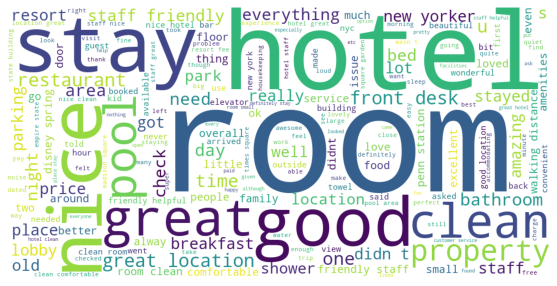

In [48]:
#plot the WorCloud image
wordcloud=WordCloud(width=1000,height=500,background_color ='white',stopwords=stopwords).generate(text)
plt.figure(figsize=(20,5))
plt.imshow(wordcloud)
plt.axis('off')

### EDA on Negative Reviews

In [49]:
data_negative=data[data['polarity']<0]

In [50]:
data_negative.shape

(914, 5)

In [51]:
data_negative.head()

Review       date  \
16  great needed place sleep parking 20 day isn’t ... 2019-08-19   
28  ·there nothing complain location  close boudwi... 2019-08-18   
31  ·the location ·the pricing parking extra fees ... 2019-08-18   
32  ·only 10 minutes td garden ·the room refrigera... 2019-08-18   
36  rooms dirty aged breakfast poor quality limite... 2019-08-17   

                    Location  Review_length  polarity  
16                         -             33 -0.033333  
28  United States of America             71 -0.034077  
31  United States of America             11 -0.093750  
32  United States of America             33 -0.169524  
36                         -              8 -0.292857

In [52]:
text2=(' '.join(data_negative['Review']))

In [53]:
text2=re.sub('[^a-zA-Z]',' ',text2)

In [54]:
text2=re.sub(' +',' ',text2)

In [55]:
text2[0:1000]

'great needed place sleep parking day isn t bad area floor pool located constant flow loud people storming hallway poorly set since way pool probably put us since used third party booking site there nothing complain location close boudwin charles station major tour spots freedom trail also within walking distance favorite part jogging along charles river morning made feel like living boston although breakfast provided expensive us made home every morning whole foods around corner gym second floor equipment limited still basic training it there microwave electric kettle inconvenient especially guests china generally used drinking hot water checkin time another drawback pm late the location the pricing parking extra fees charging every little thing only minutes td garden the room refrigerator microwave ran toilet paper tissues middle night cleaning maintenance people knocked walked right didnt matter changing showering woke cockroaches room worst ive ever spent rooms dirty aged breakfast

(-0.5, 999.5, 499.5, -0.5)

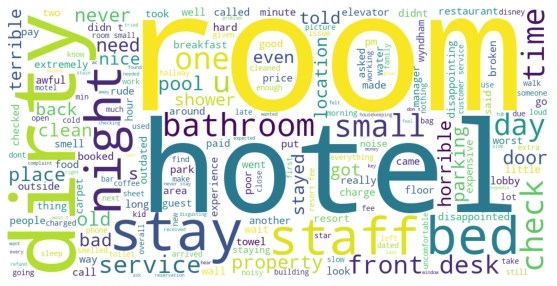

In [56]:
wordcloud2=WordCloud(width=1000,height=500,background_color ='white',stopwords=stopwords).generate(text2)
plt.figure(figsize = (20, 5)) 
plt.imshow(wordcloud2) 
plt.axis("off") 

##### CONCLUSION >>>
In 5955 reviews after cleaning, can then categorize them as positive, negative and neutral reviews based on Polarity.         

And can calculate reviews percentage based on length of Polarity,                                                           

Positive Reviews = 78.3% , Neutral Reviews = 6.34%, Negative Reviews = 15.34%

Top 5 attributes customers satisfied about are ROOM, STAY, CLEAN, POOL, LOCATION                                              

Top 5 attributes customers dissatisfied about are ROOM, DIRTY, STAFF, BATHROOM, BED

## Finding most customers Location

In [57]:
locations = '' 
for val in df['Location']:
    # typecaste each val to string
    
    # split the value 
    tokens = val.split()

In [58]:
wordcloud3 = WordCloud().generate(' '.join(data['Location']))

In [59]:
text3=(' '.join(df['Location']))

In [60]:
wordcloud3 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text3) 

(-0.5, 799.5, 799.5, -0.5)

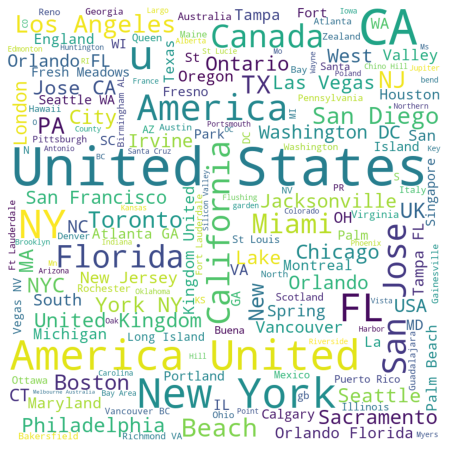

In [61]:
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud3) 
plt.axis("off") 

##### Conclusion >>>
The 3 countries from which most of the Customers visit the hotel are from, UNITED STATES OF AMERICA(USA), NEW YORK(NY), CALIFORNIA(CA).

## SEO Keywords to Target

In [62]:
comment_words = '' 
for val in df['Review']:
    # typecaste each val to string
    
    # split the value 
    tokens = val.split() 
    
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words=comment_words+ " ".join(tokens)+" "

In [63]:
stopwords=set(STOPWORDS)

In [64]:
wordcloud4 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

(-0.5, 799.5, 799.5, -0.5)

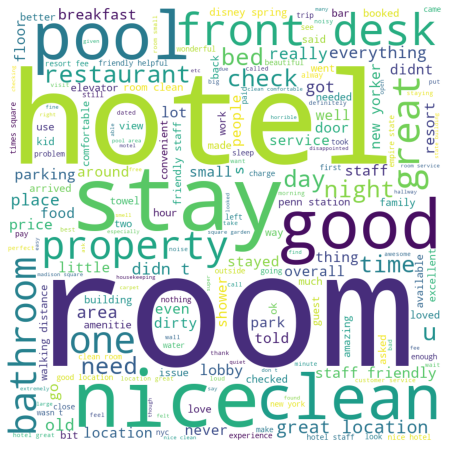

In [65]:
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud4) 
plt.axis("off") 

##### Conclusion >>>
This is exactly the customers behaviour, so the management needs to focus on these SEO keywords, Mainly
RESTAURANT, CLEANLINESS, SERVICE, STAFF BEHAVIOUR, LOCATION

## Pandas Profiling Overview

In [66]:
from pandas_profiling import ProfileReport

In [67]:
profile=ProfileReport(data)

In [68]:
profile.to_file(output_file="Project.html")

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [69]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [70]:
data = {'good':9, 'amazing':8, 'great':7, 'nice':5, 'perfect':3}
reviews = list(data.keys())
count = list(data.values())

In [71]:
fig = plt.figure(figsize = (10, 5))

<Figure size 720x360 with 0 Axes>

<BarContainer object of 5 artists>

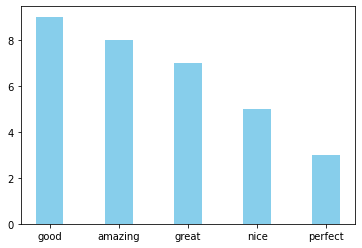

In [72]:
plt.bar(reviews, count, color ='skyblue',
        width = 0.4)

##### Conclusion from Pandas_Profiling >>>
Many customers find the hotel GOOD, AMAZING, GREAT, NICE, PERFECT.

# 5 Insights from the Data

1) In 5955 reviews after cleaning, can then categorize them as positive, negative and neutral reviews based on Polarity. And can calculate reviews percentage based on length of Polarity, Positive Reviews = 78.3% , Neutral Reviews = 6.34%, Negative Reviews = 15.34%

2)Top 5 attributes customers satisfied about are ROOM, STAY, CLEAN, POOL, LOCATION

3)Top 5 attributes customers dissatisfied about are ROOM, DIRTY, STAFF, BATHROOM, BED

4)The 3 countries from which most of the Customers visit the hotel are from, UNITED STATES OF AMERICA(USA), NEW YORK(NY), CALIFORNIA(CA).

5)Management needs to focus on the SEO keywords like RESTAURANT, CLEANLINESS, SERVICE, STAFF BEHAVIOUR, LOCATION mainly.
  And many customers find the hotel GOOD, AMAZING, GREAT, NICE, PERFECT.

# **********************************************************************************************